# Tenis Data Analysis

###### We are going to work with data, so the **very first** thing to do is to understand how to **load** data.

###### Data may come in many many formats - and for sure we are not going to cover all the possible scenarios - only the **most common** ones.

###### To do so, we are going to introduce one of the most important library in the Python Scientific ecosystem: `pandas`.

In [1]:
import pandas as pd
import numpy as np

### Reading data in CSV

###### The CSV (Comma Separated Values) is one of the most popular format of data:
###### - each column of data is separated by a comma (or other equivalent and specified separator);
###### - the first row of the file may correspond to column headers;
###### - the first column of each row may correspond to values of the `row index`.
###### To read a file in CSV format, `pandas` provide a built-in `read_csv` function
```
##### In this case this should be a good way to cast the columns:
###### Data columns (total 9 columns):
###### #   Column      Non-Null Count  Dtype         
##### ---  ------      --------------  -----         
###### 0   label       353 non-null    int64         
###### 1   reserva     353 non-null    int64         
###### 2   fechayhora  353 non-null    datetime64[ns]
###### 3   ilumina     353 non-null    category      
###### 4   servicio    353 non-null    category      
###### 5   mza-lote    353 non-null    category      
###### 6   casa        353 non-null    string        
###### 7   usuario     353 non-null    category      
###### 8   precio      353 non-null    float64   

In [2]:
df = pd.read_csv('CanchasDepurado.csv',parse_dates=['fechayhora'], 
        dtype={'ilumina':'category',  'servicio':'category', 'mza-lote':'category', 'casa':'string', 'usuario':'category'})

### Data Set Exploration
###### **First general rule of data analysis**: look at the data!

In [32]:
pd.set_option('display.max_rows', 10000)  # change presets for data preview
# df.head(10000)
df.head()

,reserva,fechayhora,ilumina,servicio,mza-lote,casa,usuario,precio,dayofw,rentime
0,1652644,2020-11-26 16:00:00,SOL,Cancha 1,APROBADA,N-09,Propietario,90.0,3,16:00:00
1,1687243,2020-12-02 18:00:00,LUZ,Cancha 1,APROBADA,M-03,Invitado,190.0,2,18:00:00
2,1687608,2020-12-02 19:00:00,LUZ,Cancha 2,APROBADA,H-07,Invitado,190.0,2,19:00:00
3,1712222,2020-12-04 17:00:00,SOL,Cancha 1,APROBADA,E-08,Invitado,90.0,4,17:00:00
4,1712511,2020-12-04 18:00:00,LUZ,Cancha 1,APROBADA,PRUEBA,Propietario,190.0,4,18:00:00


###### The file looks ok. The prices are well set in the `Tenis Data Wrangling` step. (Look at the .ipynb)
###### Let's do a review
```

#### Data Set Profile Review

In [4]:
# see with numpy
type(df)

pandas.core.frame.DataFrame

In [5]:
# see with pandas method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   label       353 non-null    int64         
 1   reserva     353 non-null    int64         
 2   fechayhora  353 non-null    datetime64[ns]
 3   ilumina     353 non-null    category      
 4   servicio    353 non-null    category      
 5   mza-lote    353 non-null    category      
 6   casa        353 non-null    string        
 7   usuario     353 non-null    category      
 8   precio      353 non-null    float64       
dtypes: category(4), datetime64[ns](1), float64(1), int64(2), string(1)
memory usage: 15.6 KB


In [6]:
# Remove label column that it's not necesary
df.drop(['label'], axis=1, inplace =True)

<Axes: xlabel='dia', ylabel='cantidad de clases'>

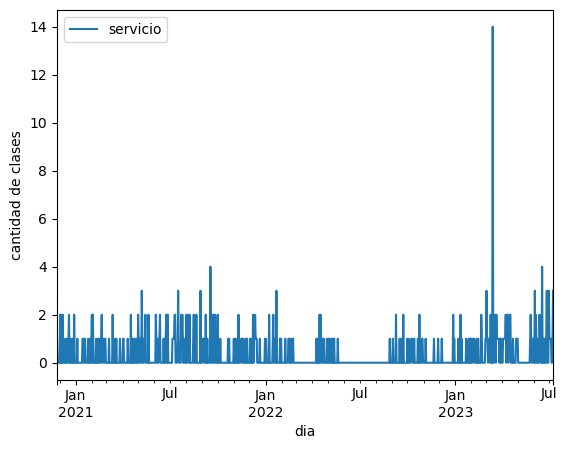

In [7]:
# Classes per day - resample option
df_cl = df.resample("D", on='fechayhora').count()
df_cl.plot(y='servicio', xlabel='dia', ylabel='cantidad de clases')

In [8]:
df_cl[df_cl['servicio']>2]

,reserva,ilumina,servicio,mza-lote,casa,usuario,precio
fechayhora,,,,,,,
2021-05-08,3,3,3,3,3,3,3
2021-07-17,3,3,3,3,3,3,3
2021-08-29,3,3,3,3,3,3,3
2021-09-17,4,4,4,4,4,4,4
2022-01-22,3,3,3,3,3,3,3
2023-03-02,3,3,3,3,3,3,3
2023-03-14,14,14,14,14,14,14,14
2023-06-03,3,3,3,3,3,3,3
2023-06-17,4,4,4,4,4,4,4


In [9]:
df_RV_INT = df[df['casa'] == "RV-INT"]
df_RV_INT

,reserva,fechayhora,ilumina,servicio,mza-lote,casa,usuario,precio
246,7376202,2023-02-06 19:00:00,LUZ,Cancha 1,APROBADA,RV-INT,Propietario,250.0
264,7600464,2023-03-14 11:00:00,SOL,Cancha 2,APROBADA,RV-INT,Invitado,250.0
265,7600463,2023-03-14 11:00:00,SOL,Cancha 1,APROBADA,RV-INT,Invitado,250.0
266,7600466,2023-03-14 12:00:00,SOL,Cancha 2,APROBADA,RV-INT,Invitado,250.0
267,7600465,2023-03-14 12:00:00,SOL,Cancha 1,APROBADA,RV-INT,Invitado,250.0
268,7587657,2023-03-14 13:00:00,SOL,Cancha 2,APROBADA,RV-INT,Invitado,250.0
269,7587656,2023-03-14 13:00:00,SOL,Cancha 1,APROBADA,RV-INT,Propietario,150.0
270,7587658,2023-03-14 14:00:00,SOL,Cancha 1,APROBADA,RV-INT,Propietario,150.0
271,7587659,2023-03-14 14:00:00,SOL,Cancha 2,APROBADA,RV-INT,Invitado,250.0
272,7587661,2023-03-14 15:00:00,SOL,Cancha 2,APROBADA,RV-INT,Invitado,250.0


In [10]:
# Classes and Income per day - option groupby
# df_cin = df.groupby(['fechayhora']).sum('precio')
df_cin = df.groupby(df['fechayhora'].dt.year)['precio'].agg(['count','sum'])
df_cin

,count,sum
fechayhora,,
2020,16,2540.0
2021,154,21200.0
2022,65,8900.0
2023,118,26100.0


fechayhora
2020     2540.0
2021    21200.0
2022     8900.0
2023    26100.0
Name: sum, dtype: float64

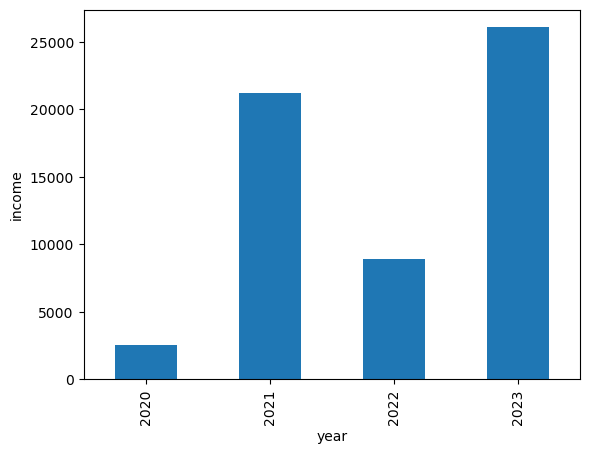

In [11]:
df_cin['sum'].plot.bar(xlabel='year', ylabel='income')
df_cin['sum']

In [12]:
df_cin2 = df_cin.cumsum()
df_cin2

,count,sum
fechayhora,,
2020,16,2540.0
2021,170,23740.0
2022,235,32640.0
2023,353,58740.0


<Axes: xlabel='year', ylabel='acumulated income'>

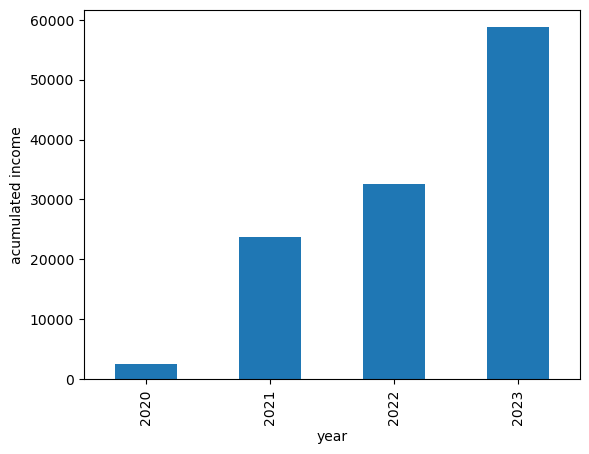

In [13]:
df_cin2['sum'].plot.bar(xlabel='year', ylabel='acumulated income')

fechayhora
2020     16
2021    154
2022     65
2023    118
Name: count, dtype: int64

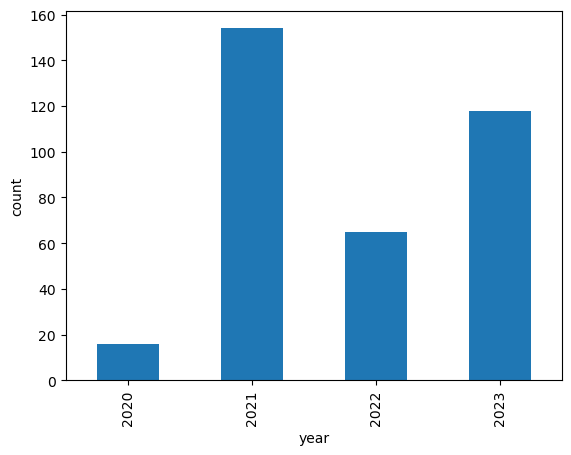

In [14]:
df_cin['count'].plot.bar(xlabel='year', ylabel='count')
df_cin['count']

In [15]:
df.head()

,reserva,fechayhora,ilumina,servicio,mza-lote,casa,usuario,precio
0,1652644,2020-11-26 16:00:00,SOL,Cancha 1,APROBADA,N-09,Propietario,90.0
1,1687243,2020-12-02 18:00:00,LUZ,Cancha 1,APROBADA,M-03,Invitado,190.0
2,1687608,2020-12-02 19:00:00,LUZ,Cancha 2,APROBADA,H-07,Invitado,190.0
3,1712222,2020-12-04 17:00:00,SOL,Cancha 1,APROBADA,E-08,Invitado,90.0
4,1712511,2020-12-04 18:00:00,LUZ,Cancha 1,APROBADA,PRUEBA,Propietario,190.0


In [16]:
df['dayofw']=df['fechayhora'].dt.dayofweek
df_dow = df['dayofw']

In [17]:
df_do_w = df.groupby('dayofw').count()
df_do_w.columns

Index(['reserva ', 'fechayhora', 'ilumina', 'servicio', 'mza-lote', 'casa',
       'usuario', 'precio'],
      dtype='object')

In [18]:
df_do_w.drop(['reserva ', 'fechayhora', 'ilumina', 'servicio', 'casa',
       'usuario', 'precio'], axis=1, inplace=True)

In [19]:
df_do_w.rename(columns={'mza-lote': 'rents'}, inplace=True)
df_do_w['dayname'] = ['mon', 'tues', 'wed', 'thu', 'fry', 'sat', 'sun']

In [20]:
df_do_w

,rents,dayname
dayofw,,
0,51,mon
1,48,tues
2,45,wed
3,27,thu
4,62,fry
5,81,sat
6,39,sun


<Axes: xlabel='día', ylabel='N° alquileres'>

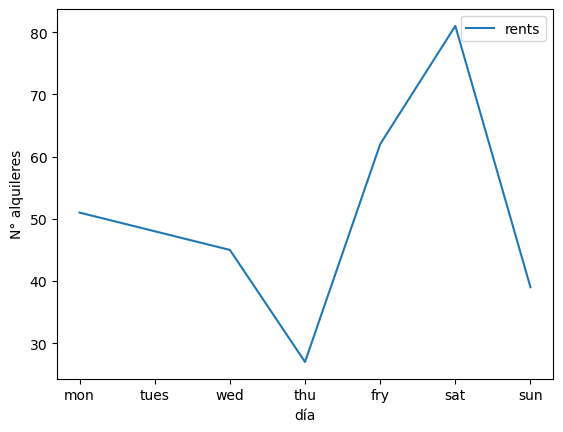

In [21]:
df_do_w.plot(x='dayname', xlabel='día', ylabel='N° alquileres')

In [22]:
# Count how many classes per hour
# df.groupby(df['fechayhora'].dt.dayofweek).all()
# df2= df.groupby(df['fechayhora'].dt.dayofweek)['fechayhora']
# df2

In [23]:
df.merge(df_do_w, how='left', on='dayofw')
df['rentime'] = df['fechayhora'].dt.time
# df.head()

In [24]:
df_freq_days = df.groupby([df['dayofw'], df['rentime']])['casa'].count()
df_freq_days.head(22)

dayofw  rentime 
0       09:00:00     1
        10:00:00     3
        11:00:00     2
        12:00:00     2
        14:00:00     1
        15:00:00    12
        16:00:00     1
        17:00:00     5
        18:00:00    14
        19:00:00     8
        20:00:00     2
1       08:00:00     2
        10:00:00     1
        11:00:00     3
        12:00:00     3
        13:00:00     2
        14:00:00     2
        15:00:00     9
        16:00:00     3
        17:00:00     4
        18:00:00     5
        19:00:00     9
Name: casa, dtype: int64

<Axes: xlabel='dayofw,rentime'>

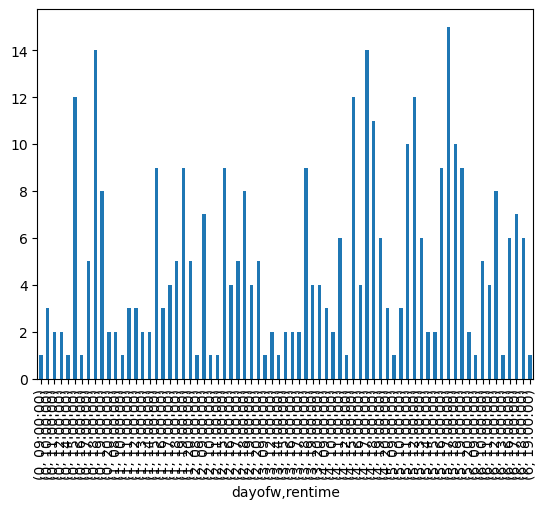

In [30]:
df_freq_days.plot.bar()

In [26]:
df_freq_hours = df.groupby([df['rentime']])['casa'].count()
df_freq_hours.head(22)

rentime
08:00:00     3
09:00:00    14
10:00:00    15
11:00:00    26
12:00:00    28
13:00:00     9
14:00:00     6
15:00:00    46
16:00:00    29
17:00:00    52
18:00:00    63
19:00:00    41
20:00:00    21
Name: casa, dtype: int64

<Axes: xlabel='rentime'>

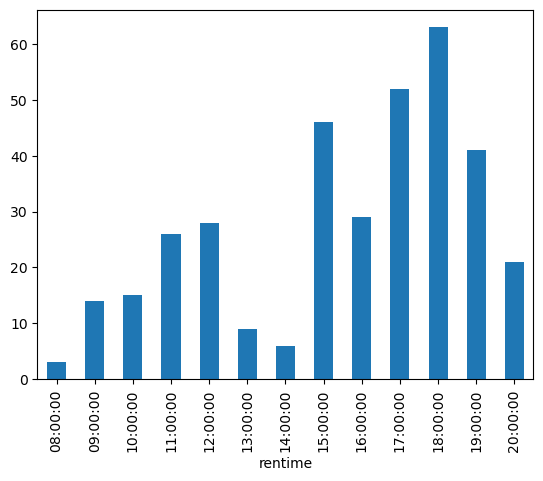

In [28]:
df_freq_hours.plot.bar()

In [81]:
df_freq_mon = df.groupby(['dayofw', 'rentime'])['casa'].count()

In [80]:
df.head()

,reserva,fechayhora,ilumina,servicio,mza-lote,casa,usuario,precio,dayofw,rentime
0,1652644,2020-11-26 16:00:00,SOL,Cancha 1,APROBADA,N-09,Propietario,90.0,3,16:00:00
1,1687243,2020-12-02 18:00:00,LUZ,Cancha 1,APROBADA,M-03,Invitado,190.0,2,18:00:00
2,1687608,2020-12-02 19:00:00,LUZ,Cancha 2,APROBADA,H-07,Invitado,190.0,2,19:00:00
3,1712222,2020-12-04 17:00:00,SOL,Cancha 1,APROBADA,E-08,Invitado,90.0,4,17:00:00
4,1712511,2020-12-04 18:00:00,LUZ,Cancha 1,APROBADA,PRUEBA,Propietario,190.0,4,18:00:00


In [89]:
df_s=df.groupby(['fechayhora','servicio'])['servicio'].count()
df_s.head(2)

fechayhora           servicio
2020-11-26 16:00:00  Cancha 1    1
                     Cancha 2    0
Name: servicio, dtype: int64

In [122]:
df_s2=df_s.groupby(level='fechayhora').sum()
df_s2=df_s2[df_s2 > 1]
df_s2

fechayhora
2021-02-01 18:00:00    2
2021-06-27 16:00:00    2
2021-09-22 18:00:00    2
2022-01-22 19:00:00    2
2022-04-15 11:00:00    2
2023-03-02 18:00:00    2
2023-03-14 11:00:00    2
2023-03-14 12:00:00    2
2023-03-14 13:00:00    2
2023-03-14 14:00:00    2
2023-03-14 15:00:00    2
2023-03-14 16:00:00    2
2023-03-14 17:00:00    2
2023-06-03 17:00:00    2
2023-06-17 15:00:00    2
2023-06-17 16:00:00    2
2023-06-26 18:00:00    2
2023-07-08 16:00:00    2
Name: servicio, dtype: int64

In [120]:
len(df_s2)

18

In [121]:
len(df_s2)/len(df)

0.05099150141643059

a) Cantidad de días/horas desde el inicio de las actividades:
b) Cantidad de días/horas que se han usado las canchas:
c) % días/horas de uso de las canchas
d) Costos de mantenimiento
    d.1 (materiales y mo terceros)
    d.2 (materiales y mo propia)